Este script convierte el grafo dirigido en uno no dirigido

In [3]:
import pandas as pd

In [8]:
df = pd.read_csv("fdi_paises.csv", encoding="latin-1")

Hay valores negativos, se decidió mantenerlos pero cuando se establezca un punto de corte se los va a eliminar:
FDI financial transactions may be negative for three reasons. 
First, if there is disinvestment in assets — that is, the direct investor sells its interest in a direct investment enterprise to a third party or back to the direct investment enterprise. Second, if the parent borrowed money from its 
affiliate or if the affiliate paid off a loan from its direct investor. Third, if reinvested earnings are negative. Reinvested earnings are negative if the affiliate loses money or if the dividends paid out to the direct investor are  greater than the income recorded in that period. 
Negative FDI positions largely result when the loans from the affiliate to its parent exceed the loans and equity capital given by the parent to the affiliate. This is most likely to occur when FDI statistics are presented by partner country


In [17]:
df2 = df[["Partner country", "Reporting country", "Year","Value"]].groupby(by=["Partner country", "Reporting country", "Year"], as_index=False).sum()

La info está en millones de dólares

In [37]:
df2["Year"].unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013], dtype=int64)

Como 2013 es un año raro, elijo 2012

In [51]:
df2.groupby(by="Year").sum().sort_values("Value", ascending = False)

,Value
Year,
2007,3405741.446
2008,2796016.017
2011,2490194.195
2006,2181469.865
2012,2036865.644
2009,1864752.828
2010,1824352.342
2005,1584196.164
2004,1264525.151


In [48]:
df_2003 = df2[df2["Year"]==2003]
df_2007 = df2[df2["Year"]==2007]
df_2012 = df2[df2["Year"]==2012]

In [53]:
df_2003.to_csv("fdi_paises_no_dirig_2003_w.csv")
df_2007.to_csv("fdi_paises_no_dirig_2007_w.csv")
df_2012.to_csv("fdi_paises_no_dirig_2012_w.csv")

In [69]:
import matplotlib.pyplot as plt

Los deltas que se van a emplear para generar las matrices no pesadas surgen de los histogramas que se observan a continuación. En todos los casos se decidió tomar desde 0 hasta un poco más del salto discreto que se observa. 
Para 2003 se emplea el rango 0 a 60.
Para 2007 se emplea el rango 0 a 80.
Para 2012 se emplea el rango 0 a 250.


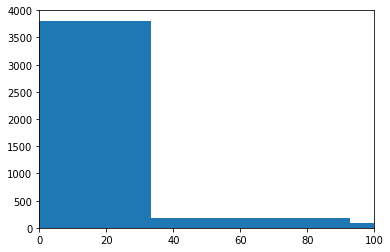

In [89]:
hist_1 = plt.hist(df_2003.dropna()["Value"], bins = 1000)
plt.xlim(xmin=0, xmax = 100)
plt.show(hist_1)

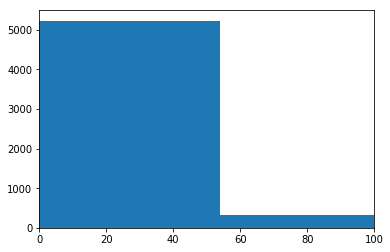

In [90]:
hist_1 = plt.hist(df_2007.dropna()["Value"], bins = 1000)
plt.xlim(xmin=0, xmax = 100)
plt.show(hist_1)

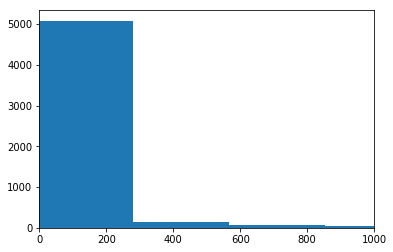

In [94]:
hist_1 = plt.hist(df_2012.dropna()["Value"], bins = 1000)
plt.xlim(xmin=0, xmax = 1000)
plt.show(hist_1)

In [65]:
df_2003.sort_values(["Value"], ascending=False).quantile([0.1,0.25,0.5,0.6,0.7,0.75,0.9])


,Year,Value
0.10,2003.0,-1.1300
0.25,2003.0,0.0000
0.50,2003.0,0.0000
0.60,2003.0,0.0000
0.70,2003.0,0.2045
0.75,2003.0,2.2590
0.90,2003.0,126.5250


In [61]:
df_2007.sort_values(["Value"], ascending=False).quantile([0.1,0.25,0.5,0.75,0.9])

,Year,Value
0.10,2007.0,-0.1480
0.25,2007.0,0.0000
0.50,2007.0,0.0000
0.75,2007.0,5.0000
0.90,2007.0,291.0336
